In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
for row in lat_lngs:
    print(row)

(-71.63590103824978, 108.82926209382424)
(70.45569293783271, -42.425118721037194)
(32.534304283616066, -136.96312181832116)
(-9.386529214076134, 39.40495600008225)
(38.253829047654165, -56.055875318065745)
(19.87385395667775, -140.29578645664782)
(57.74419886548827, 9.190608030192891)
(-83.13780113025048, -83.33278435654576)
(45.76144512879037, -73.23921914955018)
(-23.184026575271574, -3.2484889825059042)
(29.77051008105903, -1.1857461486425507)
(36.47758286123724, 157.46233180329745)
(72.75060139253725, -150.56871905196888)
(0.6649315122052286, 97.53848929724955)
(-53.6725533001945, -157.96633695089395)
(44.86770955912425, -78.28969145712085)
(20.476964555288333, 158.79521446322246)
(74.02898095924112, -16.90534862078013)
(10.614479476342794, -159.76225770205204)
(-14.389550817508649, -12.634077160389438)
(78.13162613202132, -68.35966734663323)
(-16.917220601600945, 88.72894864911518)
(-48.919582559345855, -176.1604961144385)
(-18.897631080668504, -27.494564630333514)
(65.46021642375

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(zip(lats,lngs))
for row in coordinates:
    print(row)

(-71.63590103824978, 108.82926209382424)
(70.45569293783271, -42.425118721037194)
(32.534304283616066, -136.96312181832116)
(-9.386529214076134, 39.40495600008225)
(38.253829047654165, -56.055875318065745)
(19.87385395667775, -140.29578645664782)
(57.74419886548827, 9.190608030192891)
(-83.13780113025048, -83.33278435654576)
(45.76144512879037, -73.23921914955018)
(-23.184026575271574, -3.2484889825059042)
(29.77051008105903, -1.1857461486425507)
(36.47758286123724, 157.46233180329745)
(72.75060139253725, -150.56871905196888)
(0.6649315122052286, 97.53848929724955)
(-53.6725533001945, -157.96633695089395)
(44.86770955912425, -78.28969145712085)
(20.476964555288333, 158.79521446322246)
(74.02898095924112, -16.90534862078013)
(10.614479476342794, -159.76225770205204)
(-14.389550817508649, -12.634077160389438)
(78.13162613202132, -68.35966734663323)
(-16.917220601600945, 88.72894864911518)
(-48.919582559345855, -176.1604961144385)
(-18.897631080668504, -27.494564630333514)
(65.46021642375

(58.37528478190998, 124.41671027481607)
(-22.35039801516662, -110.2851238480551)
(15.72624245999873, 0.4067020100872867)
(-63.23025599742884, -13.33416327006637)
(-48.77208253541929, -123.39607300949208)
(-86.90147858172344, -101.15328035399654)
(1.4756091583315083, -52.19323698619175)
(87.5659494216205, 117.95582791203583)
(-19.954451893328482, -74.31041788155102)
(70.72988751015535, 168.7923453641494)
(-71.12643327355954, 176.7920484077191)
(-14.028301778345508, 128.0770342832991)
(-74.49849391316428, -89.08049339933727)
(-4.0138665482593865, -106.89207597073366)
(-21.164250177759612, 145.73797100730474)
(62.34748078614109, 128.8484451952968)
(-24.871699378696718, -64.47123202438381)
(-69.08066837268132, -4.747714515580071)
(-85.94542033699307, 83.15583411625852)
(78.78853725245801, 51.46450370934238)
(60.024902008223364, -117.33608963332883)
(35.03793530459667, 74.16399685988512)
(39.643684516510575, -147.28184278873525)
(73.9868525813043, 72.3677939468773)
(-56.55788580842248, -68.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []


# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=117c18183df9a94fc3b50fc860f6046d


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | lindi
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | fjerritslev
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | contrecoeur
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | sibolga
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | bobcaygeon
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of

Processing Record 37 of Set 4 | mumford
Processing Record 38 of Set 4 | flawil
Processing Record 39 of Set 4 | carson city
Processing Record 40 of Set 4 | kutum
Processing Record 41 of Set 4 | baikunthpur
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | hobart
Processing Record 44 of Set 4 | hearst
Processing Record 45 of Set 4 | orsha
Processing Record 46 of Set 4 | las vegas
Processing Record 47 of Set 4 | flinders
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | plettenberg bay
Processing Record 1 of Set 5 | amapa
Processing Record 2 of Set 5 | talhar
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | solnechnyy
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | nemuro
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 9 of Set 5 | gasan
Processing Record 10 of Set 5 | mer

Processing Record 30 of Set 8 | naantali
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | luchegorsk
Processing Record 33 of Set 8 | alugan
Processing Record 34 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 35 of Set 8 | sumbe
Processing Record 36 of Set 8 | gat
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | pierre
Processing Record 39 of Set 8 | ahuimanu
Processing Record 40 of Set 8 | port hawkesbury
Processing Record 41 of Set 8 | harper
Processing Record 42 of Set 8 | fort payne
Processing Record 43 of Set 8 | payo
Processing Record 44 of Set 8 | vao
Processing Record 45 of Set 8 | uwayl
City not found. Skipping...
Processing Record 46 of Set 8 | phan rang
City not found. Skipping...
Processing Record 47 of Set 8 | buluang
Processing Record 48 of Set 8 | sarankhola
Processing Record 49 of Set 8 | cancun
Processing Record 50 of Set 8 | kawana waters
City not found. Skipping...
Processing Reco

Processing Record 11 of Set 12 | tucurui
Processing Record 12 of Set 12 | biak
Processing Record 13 of Set 12 | turayf
Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | morondava
Processing Record 16 of Set 12 | kushima
Processing Record 17 of Set 12 | yen bai
Processing Record 18 of Set 12 | deshna
City not found. Skipping...
Processing Record 19 of Set 12 | tokur
Processing Record 20 of Set 12 | santa maria del oro
Processing Record 21 of Set 12 | general pico
Processing Record 22 of Set 12 | aasiaat
Processing Record 23 of Set 12 | juneau
Processing Record 24 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 25 of Set 12 | hurghada
Processing Record 26 of Set 12 | bucksport
Processing Record 27 of Set 12 | krutikha
Processing Record 28 of Set 12 | jiddah
City not found. Skipping...
Processing Record 29 of Set 12 | aksu
Processing Record 30 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 31 of Set 12 | kenai
Processi

In [11]:
len(city_data)

541

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,77.58,58,55,6.82,US,2021-07-23 21:57:46
1,Tasiilaq,65.6145,-37.6368,38.89,99,100,4.50,GL,2021-07-23 21:57:03
2,Fortuna,40.5982,-124.1573,97.48,66,1,3.00,US,2021-07-23 21:58:42
3,Lindi,-10.0000,39.7167,67.46,88,26,5.39,TZ,2021-07-23 21:58:43
4,Saint-Pierre,-21.3393,55.4781,67.68,61,40,9.22,RE,2021-07-23 21:58:43
5,Hilo,19.7297,-155.0900,91.27,88,90,0.00,US,2021-07-23 21:56:53
6,Fjerritslev,57.0813,9.2664,58.86,86,0,2.64,DK,2021-07-23 21:58:43
7,Ushuaia,-54.8000,-68.3000,37.06,87,40,19.57,AR,2021-07-23 21:56:25
8,Contrecoeur,45.8501,-73.2325,79.83,53,68,3.44,CA,2021-07-23 21:58:44
9,Jamestown,42.0970,-79.2353,78.08,53,9,3.00,US,2021-07-23 21:56:30


In [13]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-07-23 21:57:46,42.6001,-73.9662,77.58,58,55,6.82
1,Tasiilaq,GL,2021-07-23 21:57:03,65.6145,-37.6368,38.89,99,100,4.50
2,Fortuna,US,2021-07-23 21:58:42,40.5982,-124.1573,97.48,66,1,3.00
3,Lindi,TZ,2021-07-23 21:58:43,-10.0000,39.7167,67.46,88,26,5.39
4,Saint-Pierre,RE,2021-07-23 21:58:43,-21.3393,55.4781,67.68,61,40,9.22
...,...,...,...,...,...,...,...,...,...
536,Matagami,CA,2021-07-23 22:01:45,49.7502,-77.6328,73.29,48,52,7.52
537,Takoradi,GH,2021-07-23 22:01:46,4.8845,-1.7554,74.68,83,80,7.29
538,Pljevlja,ME,2021-07-23 22:01:46,43.3333,19.3333,58.46,77,0,2.73
539,Shepsi,RU,2021-07-23 22:01:46,44.0361,39.1489,72.50,73,66,5.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/clean_cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv("weather_data/clean_cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2021-07-23 21:57:46,42.6001,-73.9662,77.58,58,55,6.82
1,1,Tasiilaq,GL,2021-07-23 21:57:03,65.6145,-37.6368,38.89,99,100,4.50
2,2,Fortuna,US,2021-07-23 21:58:42,40.5982,-124.1573,97.48,66,1,3.00
3,3,Lindi,TZ,2021-07-23 21:58:43,-10.0000,39.7167,67.46,88,26,5.39
4,4,Saint-Pierre,RE,2021-07-23 21:58:43,-21.3393,55.4781,67.68,61,40,9.22
5,5,Hilo,US,2021-07-23 21:56:53,19.7297,-155.0900,91.27,88,90,0.00
6,6,Fjerritslev,DK,2021-07-23 21:58:43,57.0813,9.2664,58.86,86,0,2.64
7,7,Ushuaia,AR,2021-07-23 21:56:25,-54.8000,-68.3000,37.06,87,40,19.57
8,8,Contrecoeur,CA,2021-07-23 21:58:44,45.8501,-73.2325,79.83,53,68,3.44
9,9,Jamestown,US,2021-07-23 21:56:30,42.0970,-79.2353,78.08,53,9,3.00


In [17]:
city_data_df.count()

City_ID       541
City          541
Country       539
Date          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
dtype: int64

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

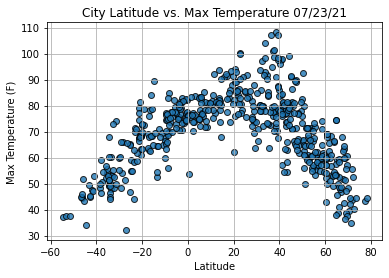

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

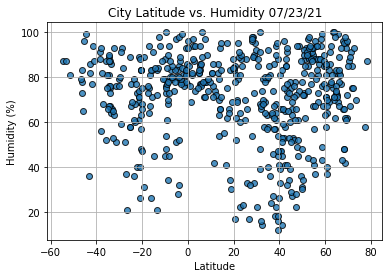

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

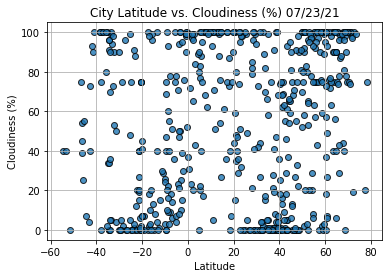

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

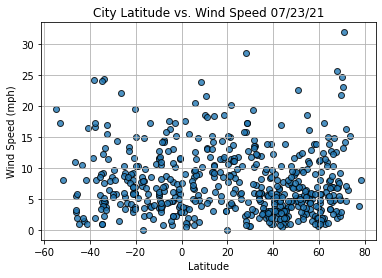

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
from scipy.stats import linregress

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
#Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13 

City_ID                        13
City                      Mataura
Country                        NZ
Date          2021-07-23 21:56:21
Lat                      -46.1927
Lng                       168.864
Max Temp                    44.47
Humidity                       78
Cloudiness                     45
Wind Speed                   2.95
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
536     True
537     True
538     True
539     True
540    False
Name: Lat, Length: 541, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2021-07-23 21:57:46,42.6001,-73.9662,77.58,58,55,6.82
1,1,Tasiilaq,GL,2021-07-23 21:57:03,65.6145,-37.6368,38.89,99,100,4.50
2,2,Fortuna,US,2021-07-23 21:58:42,40.5982,-124.1573,97.48,66,1,3.00
5,5,Hilo,US,2021-07-23 21:56:53,19.7297,-155.0900,91.27,88,90,0.00
6,6,Fjerritslev,DK,2021-07-23 21:58:43,57.0813,9.2664,58.86,86,0,2.64


In [35]:
#DataFrames for the Northern and Southern Hemispheres' data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

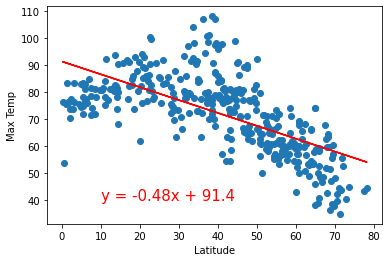

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

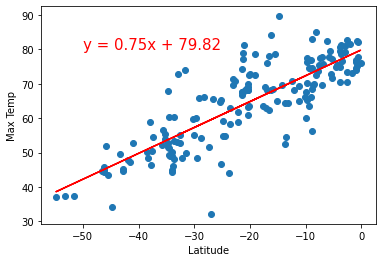

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

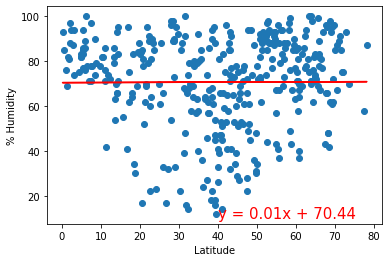

In [42]:
#Latitude vs Humidity.
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity','% Humidity',(40,10))

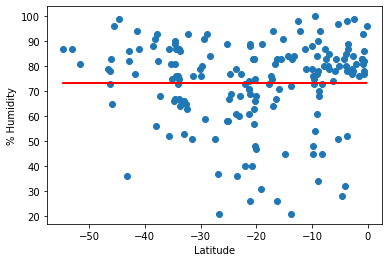

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity','% Humidity', (-50, 15))

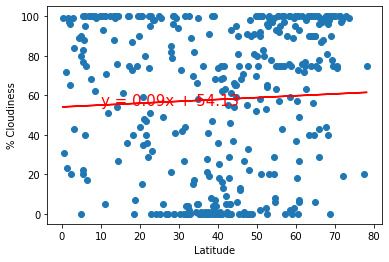

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness','% Cloudiness', (10, 55))

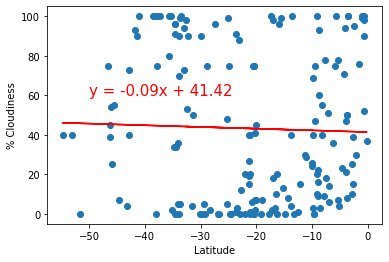

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness','% Cloudiness', (-50,60))

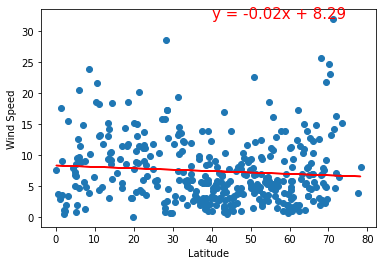

In [57]:
#Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,32))

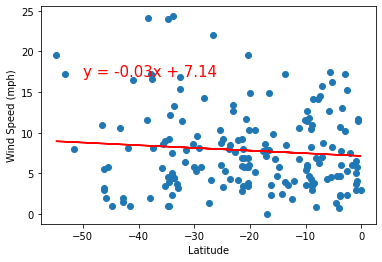

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed (mph)', (-50,17))